In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

tabla= pd.read_csv("Enzo Javier Peña Quezada - base_final.csv")



## Punto 2a

***Cree una función que determine las columnas que tienen
valores faltantes NA. Usted puede determinar si una celda tiene un ​ NA
cuando ​ df.iloc[i,j].isnull() ​ es ​ True​ . La función debe llamarse
valores_na(df) y debe entregar una tabla con los nombres, cantidad de
valores NA y porcentaje que representan del total de datos de la columna. Si
los valores faltantes representan más del 25% de sus datos se debe eliminar
la columna.***


In [2]:
def valores_na (df):
    
    nulos=df.iloc[:,9:].isnull().sum()
    porc_nulos=df.iloc[:,9:].isnull().sum()/df.shape[0]*100
    pd.DataFrame(porc_nulos)
    pd.DataFrame(nulos)
    a1=pd.concat([nulos, porc_nulos], axis=1)
    a1.rename(columns={0: 'Total nulos', 1: '% nulos'}, inplace=True)
    print(a1)
    
    porcentajes=(df.iloc[:,1:].isnull().sum()/df.shape[0])*100
    sobre25=(porcentajes[porcentajes>25]).index[0]
    df.drop(sobre25, axis=1, inplace=True)

In [3]:
valores_na(tabla)

       Total nulos    % nulos
a2002         7973  14.224292
a2003         7206  12.855920
a2004         6453  11.512524
a2005        12692  22.643260
a2006         9094  16.224220
a2007         7768  13.858560
a2008        11629  20.746807
a2009        13329  23.779705
a2010        11530  20.570185
a2011         8420  15.021766
a2012         7565  13.496396
a2013        10900  19.446229
a2014        11060  19.731678
a2015         6852  12.224363
a2016        12982  23.160637
a2017         9625  17.171555
a2018        11320  20.195533
a2019         9465  16.886106
a2020        16816  30.000714


## Punto 2b y 2c

***b. Para reparar un valor faltante, puede reemplazarlo por otro. Por ejemplo en
este caso si falta un valor para un año, puede usar el valor del cuantil 70 de
la fila.***

***c. En caso de que una fila tenga valores negativos se deben reemplazar por el
cuantil 70 de la fila. ¿Por qué cree usted que se debe realizar este
procedimiento?.***

In [4]:
#Reemplaza los valores negativos por valores nulos

num = tabla._get_numeric_data()
num[num<0]=None

#se cambian los antiguos Nan con los nuevos por el quantil 70
tablasin=tabla.iloc[:,:].where(tabla.iloc[:,0:].isnull() == False,tabla.quantile(.7, axis=1), axis=0)



## Punto 2d
***Busque outliers en cada fila. Si encuentra alguno, reemplácelo por la ​ media
truncada de la fila (esto es la media de la región-provincia-comuna en los
años 2002-2020). ¿Cómo encontrar un outlier? una forma de encontrar un
outliers es buscar valores que sean mayores (o menores) que la media más
(o menos) 3 veces la desviación estándar. Haga una función que realice un
gráfico boxplot de cualquier columna y comente qué puede concluir de esto.
En caso de ser necesario, luego del análisis, vuelva a graficar los boxplot
según sus observaciones.***

In [5]:
#calculos media, desviacion estandar y media truncada

media = tablasin.iloc[:,9:].mean(1)
des=tablasin.iloc[:,9:].std(1)
meantrun=pd.Series(stats.trim_mean(tablasin.iloc[:,9:],0.3,axis=1))

#reemplazar los outliers por la media truncada

tablasin.iloc[:,9:] = tablasin.iloc[:,9:].where(tablasin.iloc[:,9:].gt(media -3*des, axis=0),meantrun, axis=0).round()#gt = buscará el valor estrictamente mayor
tablasin.iloc[:,9:] = tablasin.iloc[:,9:].where(tablasin.iloc[:,9:].lt(media +3*des, axis=0),meantrun, axis=0).round()#lt = buscará el valor estricamente menor

def boxplot (df):
    i=input('Seleccione el año: ')
    bplot = sns.catplot(data=df.iloc[:,:],x=i, y="Nombre_region", kind="box", height=7, aspect=12/9)


/home/c4e13/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


***para hacer el boxplot, se llama la funcion boxplot y dentro se llama a la matriz (puede ser tabla o tablasin, tabla con outliers y tablasin sin outliers) y luego cuando ejecutamos la funcion nos pide ingresar el año a buscar, ingresando la 
la letra "a" sin comillas ni espacios en conjunto a un año entre el 2002 al 2019 podemos obtener el boxplot del año buscado***

Seleccione el año: a2015


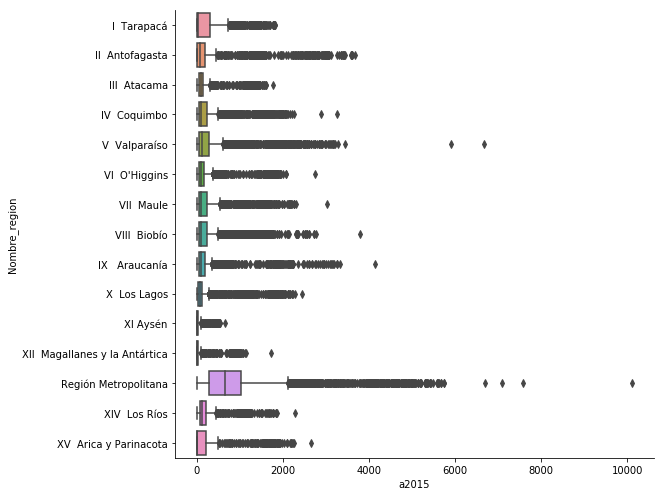

In [6]:
boxplot(tablasin)

## Punto 3a
***Cree un nuevo DataFrame donde se calcule: IM, IAM, IDD:
a. IM:
Índice de masculinidad, se refiere al número de hombres por cada
100 mujeres en una determinada zona demográfica.***

Nombre_region
XI Aysén                          109.447054
II  Antofagasta                   109.264703
XII  Magallanes y la Antártica    107.103713
I  Tarapacá                       107.051969
III  Atacama                      105.637226
X  Los Lagos                      101.705641
VI  O'Higgins                     101.084130
XV  Arica y Parinacota            100.992720
XIV  Los Ríos                     100.603069
VII  Maule                         99.225870
dtype: float64

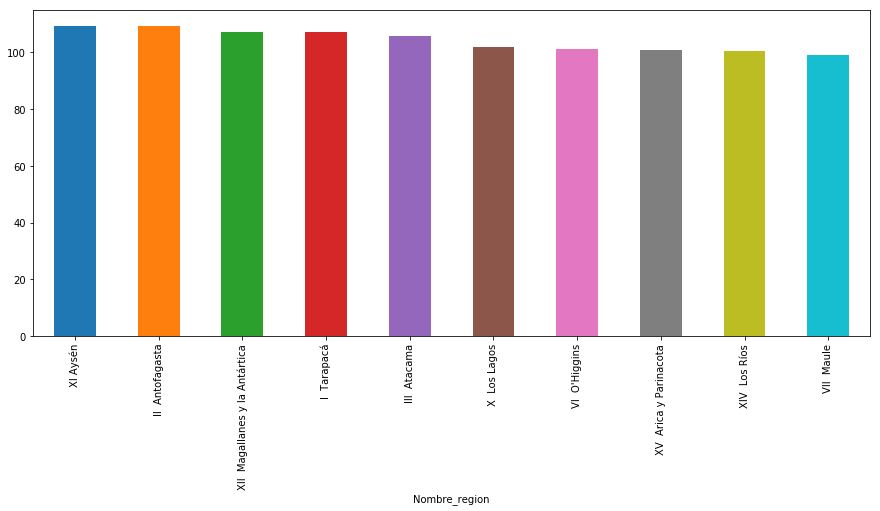

In [7]:
men=(tablasin[tablasin['Sexo']==1].loc[:,'Nombre_region':].groupby('Nombre_region').sum()/100).drop(['Sexo','Provincia','Comuna','Edad'],axis=1)
woman=(tablasin[tablasin['Sexo']==2].loc[:,'Nombre_region':].groupby('Nombre_region').sum()/100).drop(['Sexo','Provincia','Comuna','Edad'],axis=1)
IM=men/woman*100
IM.mean(axis=1).sort_values(ascending=False).head(10).plot.bar(figsize=(15, 6))
IM.mean(axis=1).sort_values(ascending=False).head(10)

## Punto 3b

***IAM:	Índice de adulto mayor, es el cuociente entre el número de  personas mayores a 60 años por cada 100 personas menores de 15 años.***

Nombre_region
V  Valparaíso                     70.924942
XIV  Los Ríos                     61.641813
VII  Maule                        60.458348
VIII  Biobío                      60.384857
XII  Magallanes y la Antártica    59.785726
IX   Araucanía                    59.212348
VI  O'Higgins                     58.293502
IV  Coquimbo                      57.909621
Región Metropolitana              57.775944
X  Los Lagos                      53.201178
dtype: float64

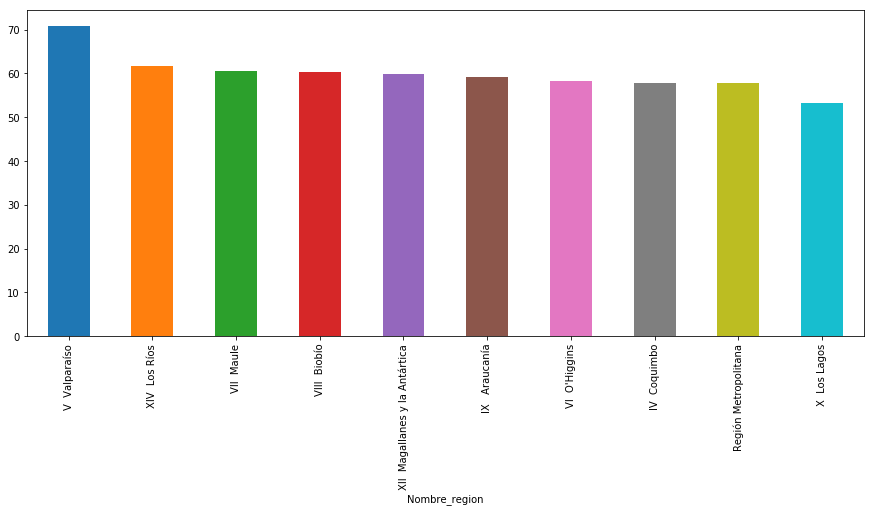

In [8]:
Mayores60=tablasin[tablasin['Edad']>60].loc[:,'Nombre_region':].groupby('Nombre_region').sum().drop(['Sexo','Provincia','Comuna','Edad'],axis=1)
Menores15=tablasin[tablasin['Edad']<15].loc[:,'Nombre_region':].groupby('Nombre_region').sum().drop(['Sexo','Provincia','Comuna','Edad'],axis=1)

IAM=Mayores60/Menores15*100

IAM.mean(axis=1).sort_values(ascending=False).head(10).plot.bar(figsize=(15, 6))
IAM.mean(axis=1).sort_values(ascending=False).head(10)

## Punto 3c
***IDD:	Índice de dependencia demográfica, expresa el índice de personas dependientes por cada cien personas potencialmente activas, es decir, la razón entre las de personas mayores de 60 años sumadas a las menores de 15, por cada 100 personas entre los 15 y 60 años (inclusive).***


Nombre_region
IX   Araucanía            56.283315
IV  Coquimbo              56.193869
III  Atacama              55.227731
V  Valparaíso             55.135589
VI  O'Higgins             55.124425
X  Los Lagos              54.952057
XIV  Los Ríos             54.807193
VII  Maule                54.589039
XV  Arica y Parinacota    54.235443
VIII  Biobío              53.575617
dtype: float64

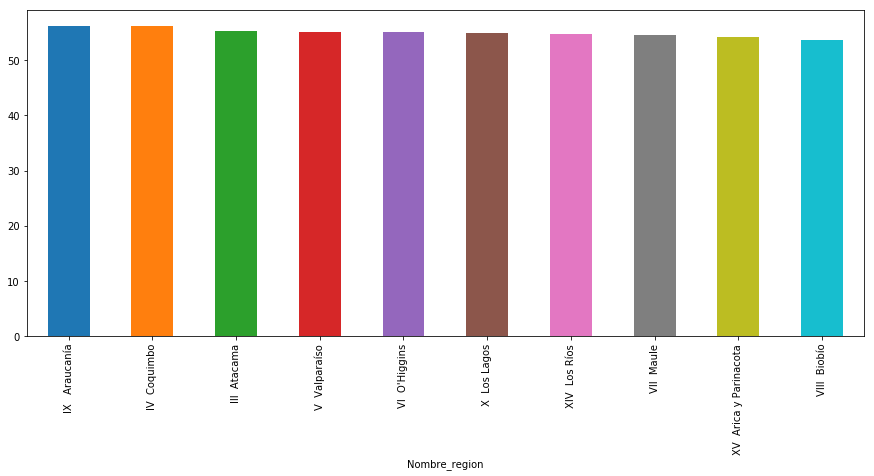

In [9]:
Activos=tablasin[(tablasin['Edad']>=15) & (tablasin['Edad']<=60)].loc[:,'Nombre_region':].groupby('Nombre_region').sum().drop(['Sexo','Provincia','Comuna','Edad'],axis=1)

Suma=Mayores60+Menores15
IDD=Suma/Activos*100

IDD.mean(axis=1).sort_values(ascending=False).head(10).plot.bar(figsize=(15, 6))
IDD.mean(axis=1).sort_values(ascending=False).head(10)

## Punto4
***Haga una tabla que resuma el total de habitantes por región para cada año.***

In [10]:
p4=tablasin.groupby(["Nombre_region"]).sum().loc[:,'a2002':].round()
p4

,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019
Nombre_region,,,,,,,,,,,,,,,,,,
I Tarapacá,256600.0,260758.0,264140.0,277875.0,279898.0,282532.0,293053.0,296533.0,303842.0,309377.0,314051.0,320069.0,326886.0,333777.0,340166.0,346084.0,350436.0,361187.0
II Antofagasta,522006.0,529229.0,538349.0,548359.0,554427.0,559188.0,571643.0,578061.0,583694.0,588139.0,596034.0,605439.0,611800.0,620906.0,622108.0,634952.0,641447.0,646203.0
III Atacama,272362.0,271720.0,272829.0,281566.0,283063.0,284341.0,289246.0,294751.0,295486.0,299071.0,302149.0,306454.0,309949.0,311990.0,316720.0,318782.0,323792.0,325100.0
IV Coquimbo,649413.0,653718.0,657433.0,683715.0,681866.0,689567.0,706294.0,719336.0,724069.0,730798.0,740263.0,752382.0,760797.0,770086.0,777092.0,788879.0,794781.0,808393.0
IX Araucanía,917998.0,927991.0,929734.0,950688.0,947240.0,949632.0,964916.0,969457.0,973601.0,974142.0,979325.0,988420.0,991438.0,995383.0,1002506.0,1005716.0,1009915.0,1013311.0
Región Metropolitana,6462005.0,6506288.0,6536723.0,6704509.0,6711785.0,6746830.0,6863534.0,6958010.0,6999744.0,7043010.0,7110784.0,7199637.0,7259779.0,7316041.0,7381276.0,7451867.0,7515245.0,7581812.0
V Valparaíso,1639127.0,1644976.0,1655604.0,1706339.0,1707315.0,1709142.0,1736583.0,1755699.0,1765754.0,1772133.0,1785994.0,1805157.0,1819731.0,1830328.0,1845590.0,1861029.0,1871674.0,1884459.0
VI O'Higgins,829591.0,836500.0,841831.0,860777.0,859376.0,864448.0,878023.0,888716.0,893592.0,895014.0,901376.0,910314.0,917537.0,922308.0,930689.0,937795.0,939944.0,949272.0
VII Maule,963370.0,969594.0,972092.0,994661.0,993406.0,997409.0,1010846.0,1018767.0,1024239.0,1025533.0,1029374.0,1038455.0,1045084.0,1047058.0,1056208.0,1061361.0,1062576.0,1072014.0


## Punto 5
***Haga una tabla que resuma el total de habitantes por región y por sexo.***

In [11]:
p5=tablasin.groupby(["Nombre_region","Sexo"]).sum().loc[:,'a2002':].round()
p5

a2002      a2003      a2004  \
Nombre_region                  Sexo                                    
I  Tarapacá                    1      133252.0   134984.0   137206.0   
                               2      123348.0   125774.0   126933.0   
II  Antofagasta                1      271595.0   275918.0   279974.0   
                               2      250410.0   253311.0   258375.0   
III  Atacama                   1      139025.0   138445.0   137973.0   
                               2      133338.0   133275.0   134856.0   
IV  Coquimbo                   1      321145.0   326077.0   325180.0   
                               2      328268.0   327641.0   332253.0   
IX   Araucanía                 1      456820.0   462431.0   461566.0   
                               2      461178.0   465560.0   468168.0   
Región Metropolitana           1     3161209.0  3173209.0  3189756.0   
                               2     3300796.0  3333078.0  3346967.0   
V  Valparaíso                  1      807455.0   806729.0   812565.0   
                               2      831672.0   838247.0   843039.0   
VI  O'Higgins                  1      417724.0   421427.0   424436.0   
                               2      411867.0   415073.0   417396.0   
VII  Maule                     1      482432.0   484438.0   487430.0   
                               2      480938.0   485156.0   484662.0   
VIII  Biobío                   1      968840.0   977162.0   982254.0   
                               2      996880.0  1002026.0  1007813.0   
X  Los Lagos                   1      383331.0   391899.0   391832.0   
                               2      376973.0   379115.0   383091.0   
XI Aysén                       1       50563.0    51006.0    52011.0   
                               2       45596.0    46254.0    46647.0   
XII  Magallanes y la Antártica 1       81087.0    80551.0    81305.0   
                               2       75820.0    75697.0    75269.0   
XIV  Los Ríos                  1      188674.0   191131.0   192282.0   
                               2      188043.0   187793.0   188035.0   
XV  Arica y Parinacota         1      101436.0    99340.0   100973.0   
                               2      101568.0   102036.0   102168.0   

                                         a2005      a2006      a2007  \
Nombre_region                  Sexo                                    
I  Tarapacá                    1      142807.0   143467.0   145992.0   
                               2      135068.0   136431.0   136540.0   
II  Antofagasta                1      283903.0   288539.0   292380.0   
                               2      264456.0   265888.0   266808.0   
III  Atacama                   1      143542.0   145070.0   144927.0   
                               2      138025.0   137993.0   139414.0   
IV  Coquimbo                   1      340644.0   337419.0   341636.0   
                               2      343071.0   344447.0   347931.0   
IX   Araucanía                 1      469981.0   470036.0   470328.0   
                               2      480707.0   477204.0   479304.0   
Región Metropolitana           1     3275013.0  3274400.0  3290110.0   
                               2     3429497.0  3437386.0  3456721.0   
V  Valparaíso                  1      836145.0   837817.0   839985.0   
                               2      870194.0   869497.0   869158.0   
VI  O'Higgins                  1      433875.0   433085.0   435548.0   
                               2      426902.0   426291.0   428900.0   
VII  Maule                     1      497308.0   494670.0   498124.0   
                               2      497352.0   498736.0   499286.0   
VIII  Biobío                   1     1001072.0   999657.0  1001026.0   
                               2     1027445.0  1026073.0  1028119.0   
X  Los Lagos                   1      401009.0   400412.0   402607.0   
                               2      394525.0   391740.0   396361.0   
XI Aysén

## Punto 6
***Encuentre las 10 comunas con el mayor IDD***

In [12]:
Ma60=tablasin[tablasin['Edad']>60].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Comuna','Provincia','Edad'],axis=1)
Me15=tablasin[tablasin['Edad']<15].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Comuna','Provincia','Edad'],axis=1)
Sum=Ma60+Me15
act6=tablasin[(tabla['Edad']>=15) &(tablasin['Edad']<=60)].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Comuna','Provincia','Edad'],axis=1)
IDD6=Sum/act6*100
IDD6.mean(axis=1).sort_values(ascending=False).head(10)

Nombre_comuna
Camiña             91.027359
Canela             73.368858
Huara              72.845518
Río Hurtado        71.931672
Navidad            70.969351
Curarrehue         70.551717
Saavedra           70.319271
Melipeuco          69.698640
Alto del Carmen    69.698082
Combarbalá         69.046831
dtype: float64

## Punto 7
***Encuentre las 10 comunas con el mayor IM en la región metropolitana***

In [13]:
Homs=tablasin[(tablasin['Sexo']==1)&(tablasin['Nombre_region']=='Región Metropolitana')].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Provincia','Comuna','Edad'],axis=1)
Mujs=tablasin[(tablasin['Sexo']==2)&(tablasin['Nombre_region']=='Región Metropolitana')].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Provincia','Comuna','Edad'],axis=1)
IM7=Homs.div(Mujs)*100
IM7.mean(axis=1).sort_values(ascending=False).head(10)

Nombre_comuna
San Pedro             119.540732
Alhué                 114.080760
Colina                113.052928
San José  de Maipo    109.592522
Tiltil                108.118914
Paine                 106.067928
Lampa                 105.824981
Curacaví              105.026403
Pirque                104.218389
Calera  de Tango      104.104369
dtype: float64

## Punto 8
***Encuentre las 10 comunas con el mayor IAM***

In [14]:
Ma60=tablasin[tablasin['Edad']>60].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Comuna','Provincia','Edad'],axis=1)
Me15=tablasin[tablasin['Edad']<15].loc[:,'Nombre_region':].groupby('Nombre_comuna').sum().drop(['Sexo','Comuna','Provincia','Edad'],axis=1)
IAM8=Ma60/Me15*100

IAM8.mean(axis=1).sort_values(ascending=False).head(10)

Nombre_comuna
Río Verde      360.315230
Timaukel       237.054161
Providencia    207.389344
Ñuñoa          145.506964
Putre          140.465907
Santiago       136.728757
Navidad        134.189736
Inpendencia    129.939135
El Tabo        115.631254
San Miguel     112.661623
dtype: float64

## Punto 9
***Encuentre las 10 comunas que hayan tenido el menor crecimiento de población femenina entre los años 2002 y 2012***

In [15]:
Muj9=tablasin[(tablasin['Sexo']==2)&(tablasin['Nombre_region'])].loc[:,'Nombre_region': "a2012"].groupby('Nombre_comuna').sum().drop(['Sexo','Provincia','Comuna','Edad',],axis=1)

Muj9.mean(axis=1).sort_values(ascending=False).tail(10)

Nombre_comuna
Primavera           275.190909
O´Higgins           240.745455
Tortel              222.445455
San Gregorio        215.218182
Torres del Paine    213.654545
Ollagüe             110.818182
Laguna Blanca        92.990909
Timaukel             62.181818
Río Verde            61.454545
Antártica            22.309091
dtype: float64

## Punto 10
***10.	Usando la tabla hecha en (4) con las regiones ordenadas de Norte a Sur, grafique el número de habitantes por región para el año 2002, 2012 y 2018.***

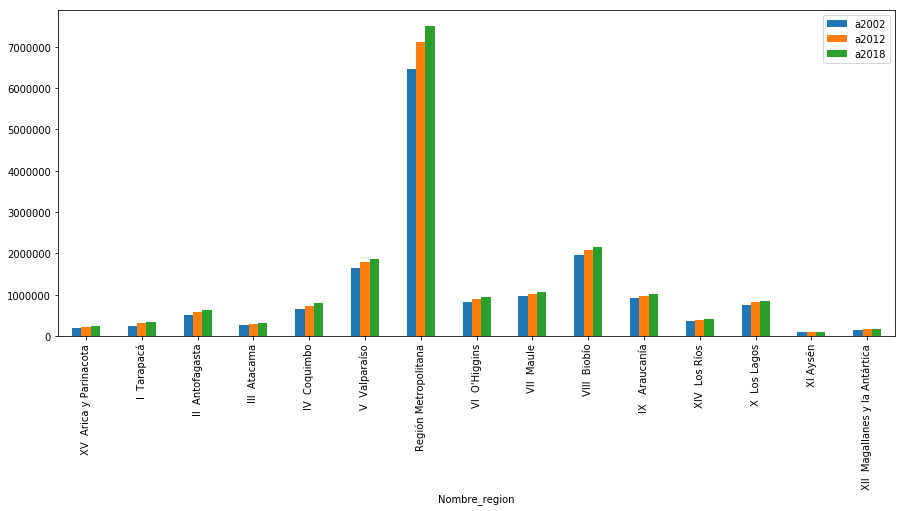

In [16]:
media = [2, 3, 4, 5,11,7,6,8,9,10,13,14,15,12,1]

p4.loc[:,:].groupby("Nombre_region").sum()[["a2002","a2012","a2018"]]

p4["orden"]=media
p4.sort_values(by="orden")[["a2002","a2012","a2018"]].plot.bar(figsize=(15, 6));

## Punto 11
***Usando la tabla hecha en (5) con las regiones ordenadas de Norte a Sur, grafique el número de habitantes por región para el año 2002, 2012 y 2018 usando el sexo como matriz.***

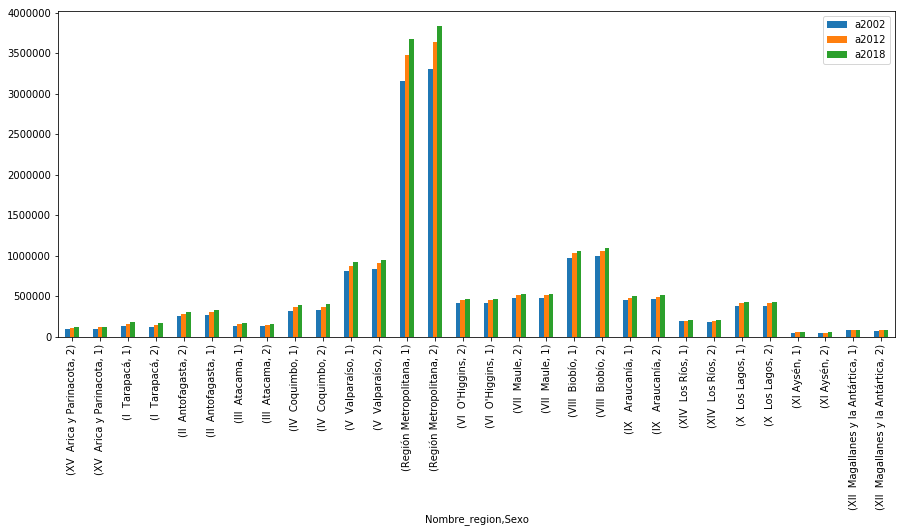

In [17]:
media2 = [2,2, 3,3, 4,4, 5,5,11,11,7,7,6,6,8,8,9,9,10,10,13,13,14,14,15,15,12,12,1,1]

p5.loc[:,:].groupby(["Nombre_region","Sexo"]).sum()[["a2002","a2012","a2018"]]
p5["orden2"]=media2
p5.sort_values(by="orden2")[["a2002","a2012","a2018"]].plot.bar(figsize=(15, 6));

## Punto 12
***Usando la tabla hecha en (4) haga un heatmap.***

[]

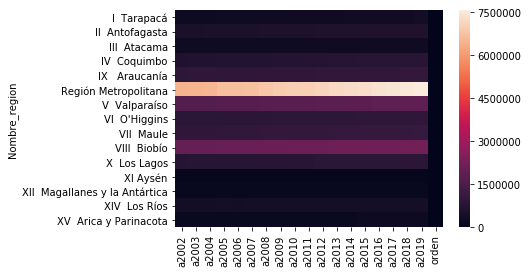

In [18]:
p4.loc[:,:].groupby('Nombre_region')
sns.heatmap(p4).plot()